In [1]:
!pip install tensorflow matplotlib

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the MNIST data
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the input data and convert labels to one-hot encoding
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Define the neural network model
model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model with different optimization techniques
optimizers = [
    'GD','SGD','MGD', 'Adam', 'RMSprop', 'Adagrad', 'NAG', 'Momentum','AMSGrad'
]
histories = []
num_epochs = 10

for optimizer in optimizers:
    if optimizer == "GD":
      opt = keras.optimizers.get("SGD")
      model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
      history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=0, batch_size=len(X_train))
      histories.append(history)
    elif optimizer == "MGD":
      opt = keras.optimizers.SGD()
      model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
      history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=0, batch_size=32)
      histories.append(history)
    elif optimizer == "NAG":
      opt = keras.optimizers.SGD(nesterov=True)
      model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
      history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=0)
      histories.append(history)
    elif optimizer == "Momentum":
      opt = keras.optimizers.SGD(momentum=0.9)
      model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
      history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=0)
      histories.append(history)
    elif optimizer == "AMSGrad":
      opt = keras.optimizers.Adam(amsgrad=True)
      model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
      history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=0)
      histories.append(history)
    elif optimizer == "SGD":
      opt = keras.optimizers.SGD()
      model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
      history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=0)
      histories.append(history)
    elif optimizer == "Adam":
      opt = keras.optimizers.Adam()
      model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
      history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=0)
      histories.append(history)
    elif optimizer == "Adagrad":
      opt = keras.optimizers.Adagrad()
      model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
      history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=0)
      histories.append(history)
    elif optimizer == "RMSprop":
      opt = keras.optimizers.RMSprop()
      model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
      history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=0)
      histories.append(history)


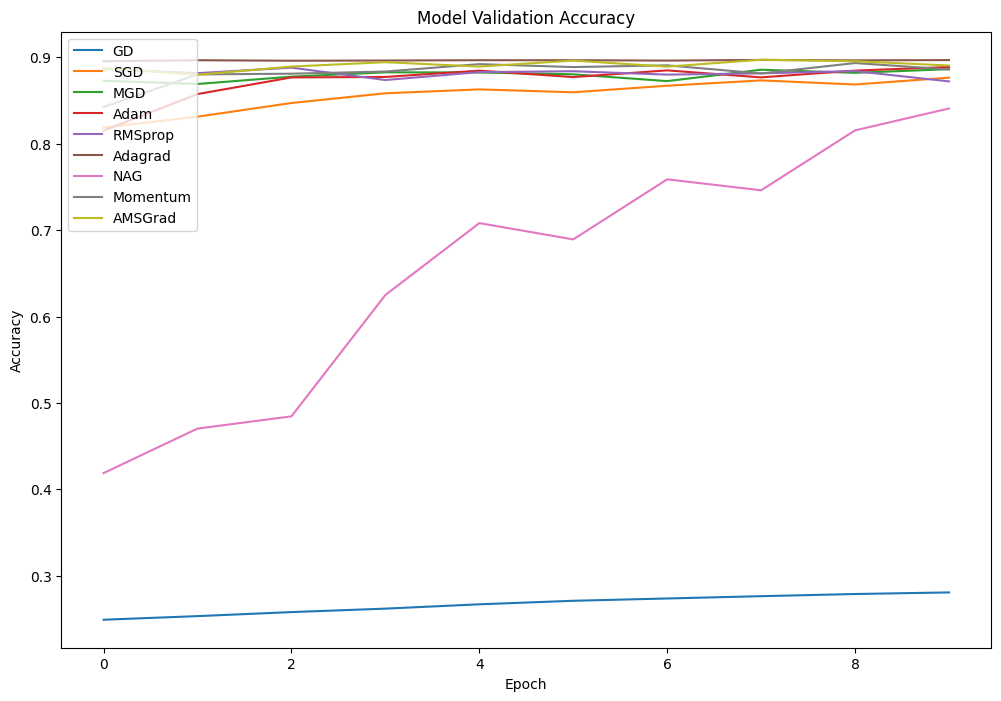

In [4]:
# Plot the training and validation accuracies for each optimizer
plt.figure(figsize=(12, 8))
for history in histories:
    plt.plot(history.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(optimizers, loc='upper left')
plt.show()

In [5]:
import pandas as pd
from tabulate import tabulate

# Assuming 'histories' contains the training history for each optimizer

# Collect validation accuracies for each optimizer
validation_accuracies = {optimizer: history.history['val_accuracy'] for optimizer, history in zip(optimizers, histories)}

# Convert to DataFrame
df = pd.DataFrame(validation_accuracies)

# Display the dataframe using tabulate for better appearance
print(tabulate(df, headers='keys', tablefmt='pretty'))



+---+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+
|   |         GD          |        SGD         |        MGD         |        Adam        |      RMSprop       |      Adagrad       |         NAG         |      Momentum      |      AMSGrad       |
+---+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+
| 0 | 0.24916666746139526 | 0.8186666369438171 | 0.8728333115577698 | 0.8151666522026062 | 0.8865833282470703 | 0.8954166769981384 | 0.41883334517478943 | 0.8424999713897705 | 0.887499988079071  |
| 1 | 0.25333333015441895 | 0.831250011920929  | 0.8690833449363708 | 0.8574166893959045 | 0.8815833330154419 | 0.8965833187103271 | 0.4703333377838135  | 0.8801666498184204 | 0.8797500133514404 |
| 2 |  0.257999